In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing required libraries 
import pandas as pd
import pgeocode
import ssl
import folium

In [3]:

ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
# Reading the data
data = pd.read_csv("E:/malay/Downloads/India%3A_PIN_Code_Boundary_2022.csv")
data.head()

,objectid,id,pin_code,office_name,office_type,circle_name,region_name,division_name,state,district,country,latitude,longitude,st_areashape,st_lengthshape
0,1,360001,360001,Rajkot,H.O,Gujarat Circle,Rajkot Region,Rajkot Division,Gujarat,Rajkot,India,22.329940,70.781959,1.588882e+07,22926.047322
1,2,360002,360002,Rajkot Manahar Plot,S.O,Gujarat Circle,Rajkot Region,Rajkot Division,Gujarat,Rajkot,India,22.282939,70.901576,7.607863e+07,43615.475950
2,3,360003,360003,Rajkot Marketing Yard,S.O,Gujarat Circle,Rajkot Region,Rajkot Division,Gujarat,Rajkot,India,22.412053,70.833628,4.448307e+08,136928.208889
3,4,360004,360004,Rajkot Postal Colony,S.O,Gujarat Circle,Rajkot Region,Rajkot Division,Gujarat,Rajkot,India,22.219762,70.751516,8.002989e+07,53487.573109
4,5,759132,759132,Hulurisinga,S.O,Odisha Circle,Sambalpur Region,Dhenkanal Division,Odisha,Anugul,India,20.644088,84.829735,8.658242e+08,282994.268897


In [5]:
# Checking missing values
data.isnull().sum()

objectid            0
id                  0
pin_code            0
office_name         7
office_type         7
circle_name         7
region_name         8
division_name       8
state               0
district          318
country             0
latitude            0
longitude           0
st_areashape        0
st_lengthshape      0
dtype: int64

In [6]:
# Dropping Missing values
data.dropna(inplace = True)
# data.shape
data.reset_index(inplace = True)

In [7]:
# Function to get latitude and longitude (IF NOT GIVEN IN DATA)
def get_latitude(pincode) :
    nomi = pgeocode.Nominatim('in')
    a = nomi.query_postal_code(pincode)
    return a['latitude']
def get_longitude(pincode) :
    nomi = pgeocode.Nominatim('in')
    a = nomi.query_postal_code(pincode)
    return a['longitude']

In [20]:
## Taking input 
r = int(input("Radius of search: "))
pin = input("Enter center point of search: ")
distr = input("Enter District: ")

# Defining function to get pincodes
def get_pincodes(data,r,pin) :
    '''Function to get the list of pincodes within a 
       specific radius.
       
       Parameters- data : data containing the pincodes 
                   r : radius of search
                   pin : center point of pincode search
                   
       Output- pin_list : list of all pincodes fitting criteria
               df_final : dataframe containing all the entries
               '''
    data = data[data['district'] == distr]
    data.reset_index(inplace = True)
    
    # Getting distance of every pincode from the point
    # of origin
    dist = pgeocode.GeoDistance('in')
    data['distance'] = 0
    for i in range(len(data)) :
        data['distance'][i] = dist.query_postal_code(pin,str(data['pin_code'][i]))
    
    # Filtering based on specified radius
    df_final = data[data['distance'] <= r]
    
    # Creating a list of final pincodes
    pin_list = df_final['pin_code'].to_list()
    
    return pin_list, df_final

# Calling the function to get pincodes
pin_list,df_final = get_pincodes(data,r,pin)
       
# Getting the list of pincodes
print("The pincodes lying within range are\t", pin_list)

# Creating Spatial representation of pincodes
nomi = pgeocode.Nominatim('in')
a = nomi.query_postal_code(pin)
m = folium.Map(location=[a['latitude'], a['longitude']], tiles="OpenStreetMap", zoom_start=12)
for i in range(0,len(df_final)):
    folium.Marker([df_final.iloc[i]['latitude'], df_final.iloc[i]['longitude']]).add_to(m)
m

Radius of search: 5
Enter center point of search: 411002
Enter District: Pune
The pincodes lying within range are	 [411001, 411002, 411003, 411004, 411005, 411006, 411007, 411008, 411009, 411011, 411018, 411019, 411030, 411032, 411033, 411037, 411038, 411040, 411041, 411042, 411043, 411044, 411046, 411013, 411016, 411017, 411048]


In [16]:
len(pin_list)

54

In [21]:
import geopandas as gpd

# Read the shapefile
gdf = gpd.read_file("E:/malay/OneDrive/Desktop/Earlysalary/India%3A_PIN_Code_Boundary_2022/India%3A_PIN_Code_Boundary_2022.shp")

# Print the first few rows of the GeoDataFrame
print(gdf.head())

   objectid      id pin_code             office_nam office_typ  \
0         1  360001   360001                 Rajkot        H.O   
1         2  360002   360002    Rajkot Manahar Plot        S.O   
2         3  360003   360003  Rajkot Marketing Yard        S.O   
3         4  360004   360004   Rajkot Postal Colony        S.O   
4         5  759132   759132            Hulurisinga        S.O   

       circle_nam        region_nam          division_n    state district  \
0  Gujarat Circle     Rajkot Region     Rajkot Division  Gujarat   Rajkot   
1  Gujarat Circle     Rajkot Region     Rajkot Division  Gujarat   Rajkot   
2  Gujarat Circle     Rajkot Region     Rajkot Division  Gujarat   Rajkot   
3  Gujarat Circle     Rajkot Region     Rajkot Division  Gujarat   Rajkot   
4   Odisha Circle  Sambalpur Region  Dhenkanal Division   Odisha   Anugul   

  country   latitude  longitude    st_areasha     st_lengths  \
0   India  22.329940  70.781959  1.588882e+07   22926.047322   
1   India  2

<AxesSubplot:>

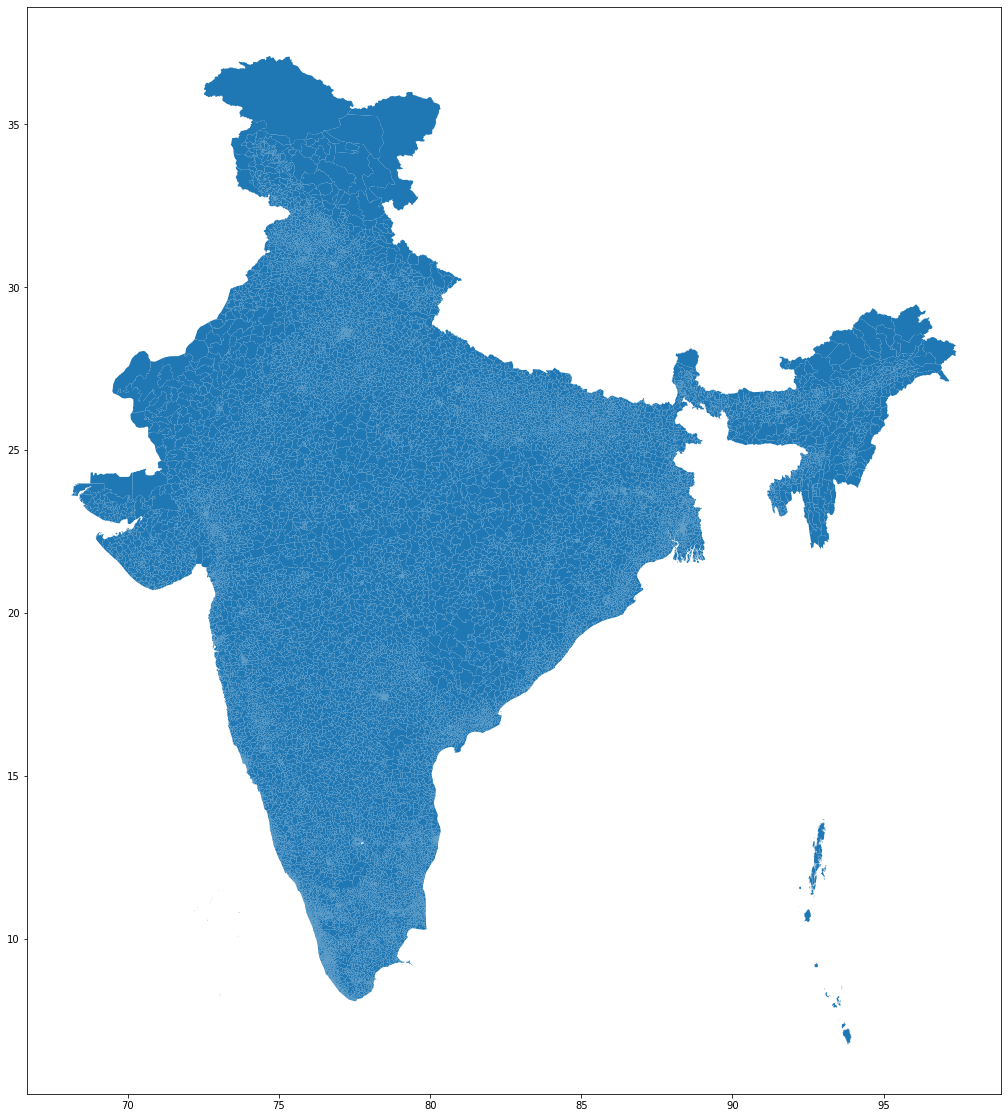

In [45]:
gdf.plot(figsize = (20,20))

<AxesSubplot:>

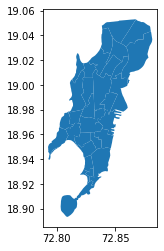

In [31]:
gdf1 = gdf[gdf['district'] == "Mumbai"]
gdf1.plot()

MemoryError: Unable to allocate 1.13 GiB for an array with shape (34497, 35075) and data type bool

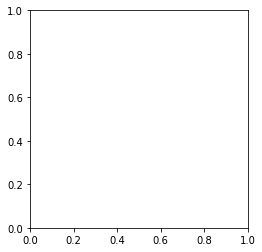

In [1]:
import rasterio
from rasterio.plot import show
fp = r"E:/malay/OneDrive/Desktop/Earlysalary/ind_ppp_2020_UNadj_constrained.tif"
img = rasterio.open(fp)
show(img)